## Изменение структуры доходов бюджета Санкт-Петербурга (2016—2024)

Источник данных: https://www.iminfin.ru/areas-of-analysis/budget/finansoviy-pasport-subjecta-rf/dokhody-detalno?territory=1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загрузка и объединение данных
years = range(2016, 2025)
dfs = []
for year in years:
    df = pd.read_csv(f'income_{year}.csv', encoding='1251')
    df = df[:17]  # Оставляем основные категории доходов
    df['Year'] = year
    dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,Показатели,План,Уточненный план/конс.бюджет субъекта РФ,Уточненный план/в т.ч. бюджет субъекта,"Темп уточненного плана к исполнению пред.года, %",Исполнено на 01.03.2016/конс.бюджет субъекта РФ,Исполнено на 01.03.2016/в т.ч. бюджет субъекта,"Темп роста к соотв. периоду прошл.года, %/по субъекту","Темп роста к соотв. периоду прошл.года, %/по ФО","Темп роста к соотв. периоду прошл.года, %/по РФ",...,Исполнено на 01.03.2020/конс.бюджет субъекта РФ,Исполнено на 01.03.2020/в т.ч. бюджет субъекта,Исполнено на 01.03.2021/конс.бюджет субъекта РФ,Исполнено на 01.03.2021/в т.ч. бюджет субъекта,Исполнено на 01.03.2022/конс.бюджет субъекта РФ,Исполнено на 01.03.2022/в т.ч. бюджет субъекта,Исполнено на 01.01.2024/конс.бюджет субъекта РФ,Исполнено на 01.01.2024/в т.ч. бюджет субъекта,Исполнено на 01.01.2025/конс.бюджет субъекта РФ,Исполнено на 01.01.2025/в т.ч. бюджет субъекта
0,ИТОГО ДОХОДОВ,441 345 789,441 355 300,432 944 351,99%,47 820 913,47 016 116,109%,115%,110%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,НАЛОГОВЫЕ И НЕНАЛОГОВЫЕ ДОХОДЫ,423 504 121,423 513 633,415 103 188,100%,46 579 417,45 774 615,108%,107%,108%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"НАЛОГИ НА ПРИБЫЛЬ, ДОХОДЫ",297 984 774,297 984 774,297 984 774,102%,33 749 594,33 749 594,114%,115%,115%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"НАЛОГИ НА ТОВАРЫ (РАБОТЫ, УСЛУГИ), РЕАЛИЗУЕМЫЕ...",22 094 617,22 094 617,22 094 617,114%,2 273 853,2 273 853,84%,88%,92%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,НАЛОГИ НА СОВОКУПНЫЙ ДОХОД,19 762 519,19 773 975,14 723 836,106%,1 818 111,1 278 407,111%,106%,110%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,АДМИНИСТРАТИВНЫЕ ПЛАТЕЖИ И СБОРЫ,"315307,1","717857,0","717857,0","120,47780475921708",NaN,NaN,"126,30261401644094","9,01813450754366","1,3944484233277017",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"752563,6425","752563,6425"
149,"ШТРАФЫ, САНКЦИИ, ВОЗМЕЩЕНИЕ УЩЕРБА","12499200,6","14169213,15","14145866,1","1,1552735410416954",NaN,NaN,"1,2805256832017267","1,277631430492878","1,312491163605435",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"15705407,16528","15675879,993599998"
150,ПРОЧИЕ НЕНАЛОГОВЫЕ ДОХОДЫ,"213221,9","200999,3","195178,3","1,0713723629991194",NaN,NaN,"4,180453741759201","6,937924523178066","1,6609913449241986",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"784291,5356","781752,7305999999"
151,БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ,"29439534,6","38563611,2","38558694,5","0,9884366935304887",NaN,NaN,"1,0501281925758275","0,964151164125659","0,9189238410132985",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"40970489,65675999","40971682,93468999"


In [3]:
# Функция для очистки чисел
def clean_number(ser):
    """Преобразует строки с числами в int, удаляя пробелы и дробную часть."""
    return ser.str.replace(r'[^\d,]', '', regex=True).str.replace(',', '.').str.split('.').str[0].astype(int)

In [4]:
aim_column = 'Уточненный план/конс.бюджет субъекта РФ'
combined_df['Cleaned_Plan'] = clean_number(combined_df[aim_column])

In [5]:
# Создание сводной таблицы
dynamic = combined_df.pivot(index='Year', columns='Показатели', values='Cleaned_Plan')
dynamic

Показатели,АДМИНИСТРАТИВНЫЕ ПЛАТЕЖИ И СБОРЫ,БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ,БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ ОТ ДРУГИХ БЮДЖЕТОВ БЮДЖЕТНОЙ СИСТЕМЫ РОССИЙСКОЙ ФЕДЕРАЦИИ,ГОСУДАРСТВЕННАЯ ПОШЛИНА,"ДОХОДЫ ОТ ИСПОЛЬЗОВАНИЯ ИМУЩЕСТВА, НАХОДЯЩЕГОСЯ В ГОСУДАРСТВЕННОЙ И МУНИЦИПАЛЬНОЙ СОБСТВЕННОСТИ",ДОХОДЫ ОТ ОКАЗАНИЯ ПЛАТНЫХ УСЛУГ И КОМПЕНСАЦИИ ЗАТРАТ ГОСУДАРСТВА,ДОХОДЫ ОТ ПРОДАЖИ МАТЕРИАЛЬНЫХ И НЕМАТЕРИАЛЬНЫХ АКТИВОВ,"ЗАДОЛЖЕННОСТЬ И ПЕРЕРАСЧЕТЫ ПО ОТМЕНЕННЫМ НАЛОГАМ, СБОРАМ И ИНЫМ ОБЯЗАТЕЛЬНЫМ ПЛАТЕЖАМ",ИТОГО ДОХОДОВ,НАЛОГИ НА ИМУЩЕСТВО,"НАЛОГИ НА ПРИБЫЛЬ, ДОХОДЫ",НАЛОГИ НА СОВОКУПНЫЙ ДОХОД,"НАЛОГИ НА ТОВАРЫ (РАБОТЫ, УСЛУГИ), РЕАЛИЗУЕМЫЕ НА ТЕРРИТОРИИ РОССИЙСКОЙ ФЕДЕРАЦИИ","НАЛОГИ, СБОРЫ И РЕГУЛЯРНЫЕ ПЛАТЕЖИ ЗА ПОЛЬЗОВАНИЕ ПРИРОДНЫМИ РЕСУРСАМИ",НАЛОГОВЫЕ И НЕНАЛОГОВЫЕ ДОХОДЫ,ПЛАТЕЖИ ПРИ ПОЛЬЗОВАНИИ ПРИРОДНЫМИ РЕСУРСАМИ,ПРОЧИЕ НЕНАЛОГОВЫЕ ДОХОДЫ,"ШТРАФЫ, САНКЦИИ, ВОЗМЕЩЕНИЕ УЩЕРБА"
Year,,,,,,,,,,,,,,,,,,
2016,2424.0,17841667.0,NaN,1455338.0,17683726.0,3716104.0,11516420.0,94.0,4.413553e+08,45718676.0,297984774.0,19773975.0,22094617.0,3385.0,4.235136e+08,447694.0,120773.0,2995631.0
2017,2469.0,13623579.0,NaN,1489798.0,18053534.0,3688744.0,8355993.0,60.0,4.923261e+08,50451748.0,347271190.0,22913742.0,21476854.0,5910.0,4.787026e+08,540521.0,219012.0,4232980.0
2018,4828.0,9325634.0,NaN,1700029.0,16954645.0,2521741.0,10066789.0,48.0,5.478467e+08,51899086.0,401558954.0,31119251.0,17839296.0,6486.0,5.385211e+08,195130.0,429618.0,4225202.0
2019,4943.0,11768976.0,NaN,1758491.0,15956724.0,2897340.0,8694991.0,11.0,6.014510e+08,45755387.0,446095877.0,39616376.0,24158079.0,10253.0,5.896820e+08,182793.0,375249.0,4175471.0
2020,6003.0,20022919.0,NaN,1842029.0,17711107.0,7488112.0,8779699.0,6.0,6.844133e+08,48954721.0,505326416.0,44858118.0,25414936.0,10313.0,6.643904e+08,183745.0,106098.0,3709109.0
2021,5720.0,30127991.0,NaN,1884971.0,15674286.0,2462702.0,10029196.0,0.0,6.546261e+08,54649598.0,462530259.0,40289082.0,30738097.0,4264.0,6.244981e+08,196619.0,99997.0,5933318.0
2022,5500.0,32633557.0,NaN,1903097.0,17554895.0,8395148.0,8777133.0,0.0,8.927786e+08,69154712.0,647829157.0,63456969.0,33065176.0,8000.0,8.601450e+08,75261.0,107796.0,9812190.0
2023,5384.0,38390719.0,NaN,1994978.0,5.0,14763939.0,10325938.0,0.0,1.099515e+09,77779439.0,781430349.0,75334202.0,36807821.0,8392.0,1.061124e+09,255599.0,191723.0,11824024.0
2024,717857.0,38563611.0,32005245.0,2271853.0,79291177.0,25632843.0,8013430.0,NaN,1.283675e+09,88710990.0,883652515.0,101942083.0,40457435.0,10342.0,1.245111e+09,40319.0,200999.0,14169213.0


C:\Users\Алексей\AppData\Local\Temp\ipykernel_8536\1016886934.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


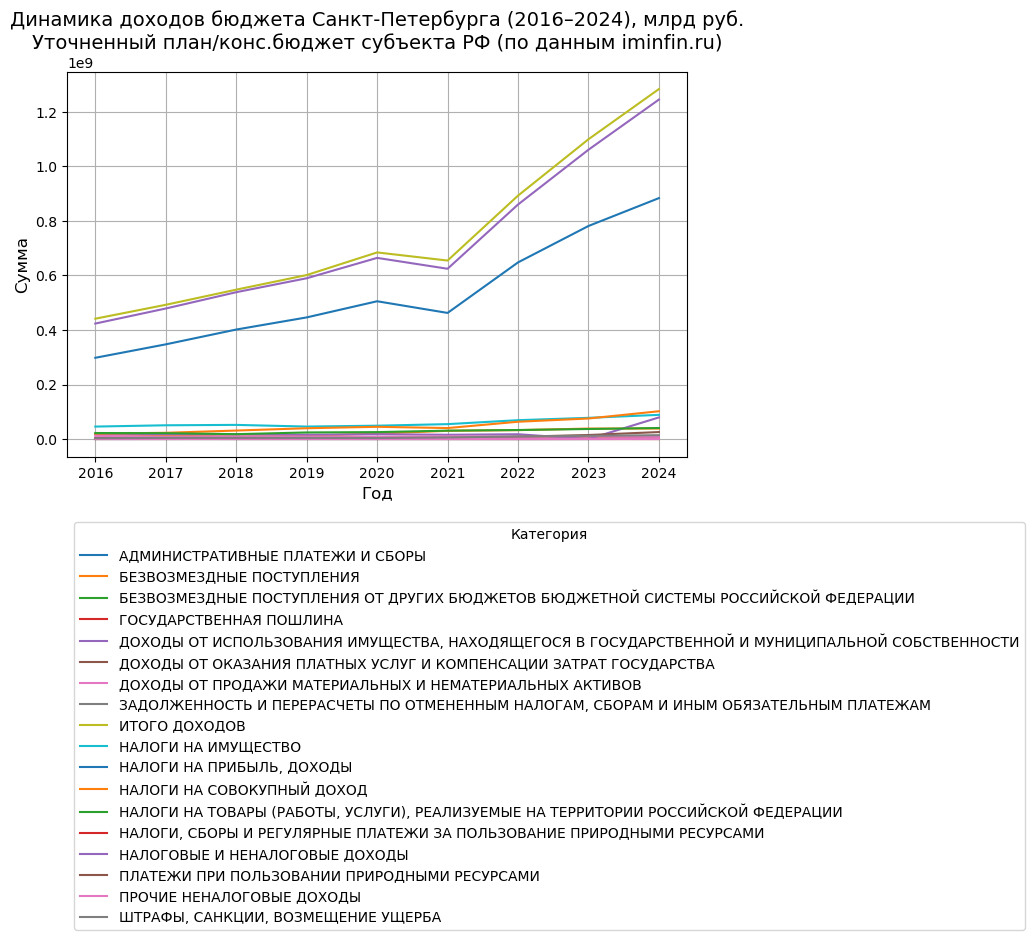

In [6]:
# Matplotlib
dynamic.plot(figsize=(8, 5))
plt.title('Динамика доходов бюджета Санкт-Петербурга (2016–2024), млрд руб.\nУточненный план/конс.бюджет субъекта РФ (по данным iminfin.ru)', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Сумма', fontsize=12)
plt.legend(title='Категория', loc='center left', bbox_to_anchor=(0.0, -0.7)) # координаты легенды относительно графика в нормализованных единицах
plt.grid(True)
plt.tight_layout()
plt.show()

array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object)

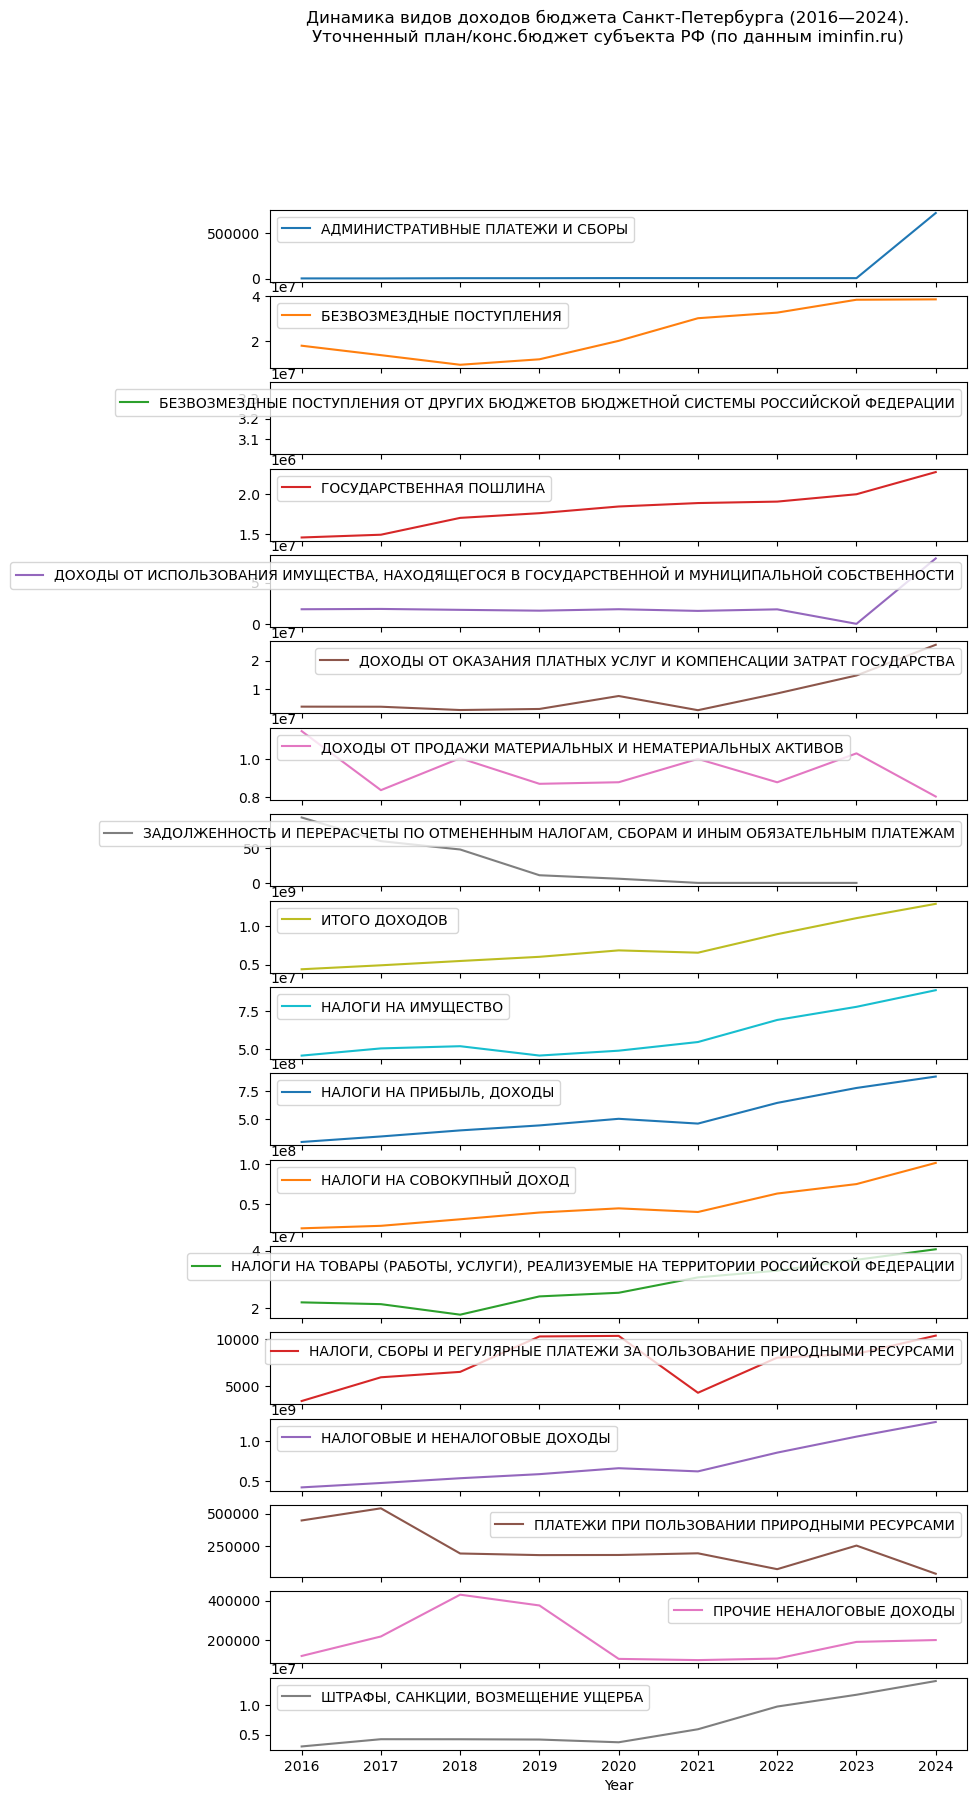

In [9]:
dynamic.plot(figsize=(9,20),
                      title='Динамика видов доходов бюджета Санкт-Петербурга (2016—2024).\nУточненный план/конс.бюджет субъекта РФ (по данным iminfin.ru)',
                      subplots=True)